In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


# Applying Survival model

## 1. 학습하기

## 1-1. Cox Proportional Hazard Model

In [3]:
X_imputed = pd.read_csv('imputed features_final.csv')
Optimal_Gas = pd.read_csv('Optimal target.csv')

In [4]:
sub_list = list(Optimal_Gas['SubjectID'])

In [5]:
X_imputed = X_imputed[['SubjectID','Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'slope_alsfrs_tot',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory']]

In [6]:
X_imputed.query("SubjectID == {0}".format(sub_list), inplace=True)
sub_list_2 = list(X_imputed['SubjectID'])
X_imputed = X_imputed.reset_index()
X_imputed.drop(columns=['index'], inplace=True)

In [7]:
Optimal_Gas.query("SubjectID == {0}".format(sub_list_2), inplace=True)
Optimal_Gas = Optimal_Gas.reset_index()
Optimal_Gas = Optimal_Gas.iloc[:, 1:]
Optimal_Gas.drop(columns='Unnamed: 0', inplace=True)

,SubjectID,time_opt,status_opt
0,329,274,0
1,348,401,0
2,533,287,1
3,708,231,0
4,902,154,0
...,...,...,...
3387,998519,280,0
3388,999166,390,0
3389,999823,184,0
3390,999880,266,0


In [8]:
X_1 = X_imputed.merge(Optimal_Gas, on='SubjectID', how='inner')

In [9]:
X_1 = X_1[X_1['time_opt']!=0]
y = X_1[['status_opt']]
X_1.drop(columns='SubjectID', inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(X_1, y, train_size=0.8, test_size=0.2, random_state=11)

모델 적용하기

In [11]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_train, 'time_opt', event_col='status_opt')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 2713 total observations, 2184 right-censored observations>
             duration col = 'time_opt'
                event col = 'status_opt'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 2713
number of events observed = 529
   partial log-likelihood = -3378.51
         time fit was run = 2021-05-16 16:23:31 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.02       1.03       0.00             0.02             0.03                 1.02                 1.03
Gender                         -0.14       0.87       0.09            -0.31             0.04                 0.73                 1.04
onset_site                      0.38       1.46       0.12             0.13             0.62                 1.14                 1.86
onset_delta                     0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diag_minus_onset                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
slope_alsfrs_tot               -1.64       0.19       1.80            -5.16             1.88                 0.01                 6.58
fvc_slope                      -0.46       0.63       0.14            -0.73            -0.19                 0.48                 0.82
fvc_mean                       -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
mean_Q10_Respiratory            0.05       1.05       0.07            -0.08             0.19                 0.92                 1.21
mean_Bulbar                    -0.48       0.62       0.04            -0.55            -0.42                 0.58                 0.66
mean_motor                     -0.04       0.96       0.01            -0.06            -0.02                 0.94                 0.98
slope_Q1_Speech                -4.05       0.02       3.39           -10.69             2.59                 0.00                13.29
slope_Q2_Salivation            -7.15       0.00       3.57           -14.16            -0.15                 0.00                 0.86
slope_Q3_Swallowing             0.12       1.12       3.70            -7.13             7.36                 0.00              1578.99
slope_Q4_Handwriting            5.09     162.71       3.43            -1.62            11.81                 0.20             1.34e+05
slope_Q5_Cutting                2.37      10.73       3.00            -3.51             8.26                 0.03              3850.35
slope_Q6_Dressing_and_Hygiene  -6.69       0.00       3.96           -14.46             1.08                 0.00                 2.94
slope_Q7_Turning_in_Bed         2.52      12.40       1.70            -0.81             5.85                 0.44               346.43
slope_Q8_Walking               -2.23       0.11       4.42           -10.90             6.43                 0.00               621.38
slope_Q9_Climbing_Stairs        0.77       2.17       2.80            -4.70             6.25                 0.01               519.90
slope_Q10_Respiratory           3.53      34.10       3.36            -3.06            10.12                 0.05             24788.45
Unnamed: 0                     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                                   z      p   -log2(p)
covariate                                             
Age                             6.20 <0.005      30.74
Gender                         -1.52   0.13       2.97
onset_site                      3.03 <0.005       8.69
onset_delta                     5.84 <0.005      

<AxesSubplot:xlabel='log(HR) (95% CI)'>

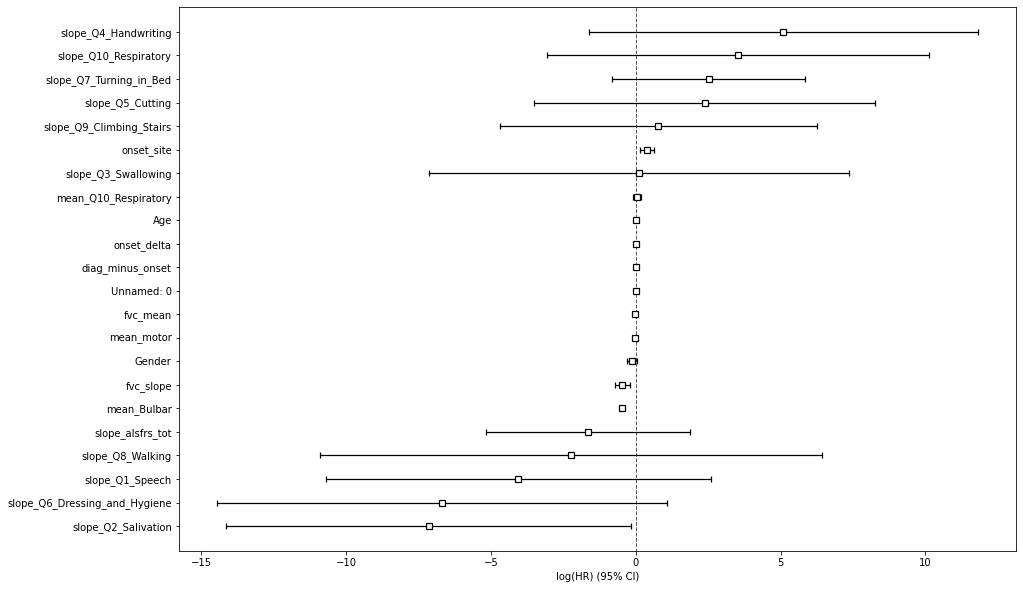

In [12]:
plt.figure(figsize=(15,10))
cph.plot()
#HR >1, 즉 log(HR)>0 이면 사망 위험 증가를 뜻함

## 1-2. Random Survival Forest model

In [13]:
conda install -c sebp scikit-survival

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [14]:
from sksurv.ensemble import RandomSurvivalForest

In [15]:
dic = {1:True, 0:False}

df_train_rsf = df_train.iloc[:, -2:][['status_opt', 'time_opt']]
df_train_rsf = df_train_rsf.replace({'status_opt':dic})

In [16]:
arr_1 = list(tuple(x) for x in df_train_rsf.to_records(index=False))
dt=np.dtype('bool, float')
y_train_rsf = np.array(arr_1, dtype=dt)
y_train_rsf.dtype.names=['cens', 'time']
y_train_rsf

array([(False,  267.), ( True,  265.), (False,  266.), ...,
       (False, 1082.), ( True,  105.), (False,  368.)],
      dtype=[('cens', '?'), ('time', '<f8')])

In [17]:
df_test_rsf = df_test.iloc[:, -2:][['status_opt', 'time_opt']]
df_test_rsf = df_test_rsf.replace({'status_opt':dic})

In [18]:
arr_2 = list(tuple(x) for x in df_test_rsf.to_records(index=False))
dt=np.dtype('bool, float')
y_test_rsf = np.array(arr_2, dtype=dt)
y_test_rsf.dtype.names=['cens', 'time']
y_test_rsf

array([(False,  373.), (False,  327.), (False,  392.), ( True,  180.),
       (False,  245.), (False,  344.), (False,  704.), (False,  326.),
       ( True,  392.), (False,  429.), (False,  392.), (False,  495.),
       (False,  269.), (False,  125.), (False,  273.), (False,  271.),
       (False,  308.), (False,  372.), (False,  365.), ( True,  188.),
       (False,  374.), (False,  450.), (False,  392.), (False,  259.),
       (False,  117.), ( True,  368.), ( True,  362.), (False,  259.),
       (False,  253.), (False,  154.), ( True,  471.), (False,  277.),
       (False,  182.), (False,  392.), (False,  415.), (False,  133.),
       (False,  161.), (False,  275.), ( True,  175.), (False,  141.),
       (False,  385.), (False,  378.), ( True,  573.), (False,  118.),
       (False,  327.), (False,  385.), (False,  134.), ( True,  287.),
       (False,  344.), (False,  373.), (False,  425.), (False,  323.),
       (False,  391.), ( True,  163.), (False,  266.), (False,  442.),
      

In [19]:
rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=20)
rsf.fit(df_train.iloc[:,:-2], y_train_rsf)

RandomSurvivalForest(max_features='sqrt', min_samples_leaf=15,
                     min_samples_split=10, n_estimators=1000, n_jobs=-1,
                     random_state=20)

## 2. 평가하기

## 2-1. C-index 계산

## 2-1-1. Repeated 5-fold cross validation on Training set

In [20]:
from lifelines.utils import k_fold_cross_validation

In [21]:
cph = CoxPHFitter()
C_Idx = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    arr = k_fold_cross_validation(cph, df_train, 'time_opt', event_col='status_opt', k=5, scoring_method="concordance_index")
    C_Idx = np.concatenate((C_Idx, arr))
print(C_Idx)

[0.84292957 0.84256698 0.86412261 0.83029537 0.83281633 0.83536567
 0.83317683 0.85849602 0.83379451 0.83492851 0.85436954 0.84890868
 0.84139747 0.81106005 0.84199777 0.85612058 0.83072703 0.85967302
 0.81956576 0.84461341 0.83876121 0.84880093 0.85661556 0.83304729
 0.8221671  0.81646859 0.85489408 0.86171451 0.85247571 0.82538199
 0.82428788 0.82399815 0.83685635 0.87553515 0.84392081 0.83295421
 0.85548398 0.81366621 0.85222092 0.83570324 0.81533153 0.82484908
 0.83832095 0.85672825 0.85266199 0.85801135 0.82064528 0.82854596
 0.83841145 0.83944163]


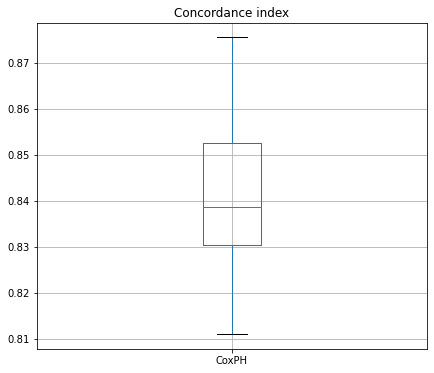

In [22]:
df = pd.DataFrame(C_Idx)
df.columns = ['CoxPH']

plt.figure(figsize=(7,6))
boxplot = df.boxplot(column=['CoxPH'])
plt.title('Concordance index')
plt.show()

In [23]:
# Cross-validation is not necessary when using random forest, 
# because multiple bagging in process of training random forest prevents over-fitting.

## 2-1-2. C-index on Test set

In [24]:
from lifelines.utils import concordance_index
cph = CoxPHFitter().fit(df_test, 'time_opt', 'status_opt')
print('COXPH shows c-index ', concordance_index(df_test['time_opt'], -cph.predict_partial_hazard(df_test), df_test['status_opt']))

COXPH shows c-index  0.8444841039262887


In [25]:
print('RSF shows c-index ', rsf.score(df_test.iloc[:, :-2], y_test_rsf))

RSF shows c-index  0.8301029301900889


Calibration 평가

ICI =  0.018105742341032342
E50 =  0.019823645360435904


C:\Users\hyji1\anaconda3\lib\site-packages\lifelines\calibration.py:45: RuntimeWarning: divide by zero encountered in log
  return np.log(-np.log(1 - p))
C:\Users\hyji1\anaconda3\lib\site-packages\lifelines\fitters\mixins.py:19: RuntimeWarning: invalid value encountered in subtract
  return self.relu(x - knot) ** 3 - (lambda_ * self.relu(x - min_knot) ** 3 + (1 - lambda_) * self.relu(x - max_knot) ** 3)


(<AxesSubplot:title={'center':'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 700 mortality'}, xlabel='Predicted probability of \nt ≤ 700 mortality', ylabel='Observed probability of \nt ≤ 700 mortality'>,
 0.018105742341032342,
 0.019823645360435904)

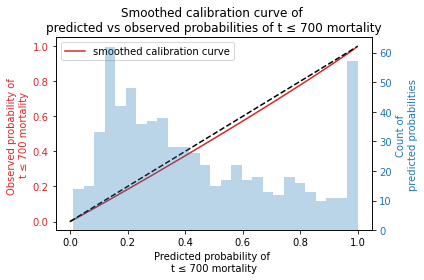

In [26]:
from lifelines.calibration import survival_probability_calibration

survival_probability_calibration(cph, df_test, t0=700)

비례위험 가정 검토

In [27]:
print(cph.check_assumptions(training_df=df_test, p_value_threshold=0.05))

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 679 total observations, 554 right-censored observations>
         test_name = proportional_hazard_test

---
                                    test_statistic    p  -log2(p)
Age                           km              0.54 0.46      1.11
                              rank            1.23 0.27      1.91
Gender                        km              0.20 0.66      0.60
                              rank            0.01 0.90      0.14
Unnamed: 0                    km              0.04 0.83      0.26
                              rank            0.03 0.86      0.22
diag_minus_onset              km              0.16 0.69      0.53
                              rank            0.07 0.79      0.35
fvc_mean                      km              0.62 0.43      1.22
                              rank            0.70 0.40      1.31
fvc_slope                     km              2.15 0.14      2.81
                              rank            4.64 0.03      5.00
mean_Bulbar                   km              0.43 0.51      0.96
                              rank            3.30 0.07      3.85
mean_Q10_Respiratory          km              0.09 0.76      0.39
                              rank            0.48 0.49      1.03
mean_motor                    km              0.05 0.83      0.28
                              rank            0.30 0.59      0.77
onset_delta                   km              1.62 0.20      2.30
                              rank            1.01 0.31      1.67
onset_site                    km              0.99 0.32      1.64
                              rank            1.12 0.29      1.79
slope_Q10_Respiratory         km              0.41 0.52      0.94
                              rank            0.96 0.33      1.62
slope_Q1_Speech               km              1.86 0.17      2.53
                              rank            1.31 0.25      1.98
slope_Q2_Salivation           km              0.51 0.47      1.07
                              rank            0.90 0.34      1.54
slope_Q3_Swallowing           km              0.15 0.70      0.52
                              rank            0.05 0.83      0.27
slope_Q4_Handwriting          km              0.29 0.59      0.76
                              rank            0.16 0.69      0.54
slope_Q5_Cutting              km              0.81 0.37      1.44
                              rank            2.50 0.11      3.13
slope_Q6_Dressing_and_Hygiene km              0.12 0.72      0.47
                              rank            0.05 0.82      0.29
slope_Q7_Turning_in_Bed       km              1.13 0.29      1.80
                              rank            2.26 0.13      2.91
slope_Q8_Walking              km              3.96 0.05      4.42
                              rank            6.81 0.01      6.79
slope_Q9_Climbing_Stairs      km              0.34 0.56      0.84
                              rank            0.93 0.33      1.58
slope_alsfrs_tot              km              0.66 0.42      1.26
                              rank            0.71 0.40      1.32



1. Variable 'fvc_slope' failed the non-proportional test: p-value is 0.0312.

   Advice 1: the functional form of the variable 'fvc_slope' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'fvc_slope' using pd.cut, and then specify it in
`strata=['fvc_slope', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'slope_Q8_Walking' failed the non-proportional test: p-value is 0.0090.

   Advice 1: the functional form of the variable 'slope_Q8_Walking' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to 

## 2-2. Individual Prediction on Test set

In [28]:
df_test_X = df_test.drop(columns=['time_opt', 'status_opt'])

In [29]:
# Selecting 3 random subjects to predict survival
test_1 = df_test_X.iloc[-7:-2, :]

In [30]:
result = cph.predict_survival_function(test_1)

Text(0.5, 1.0, 'COXPH')

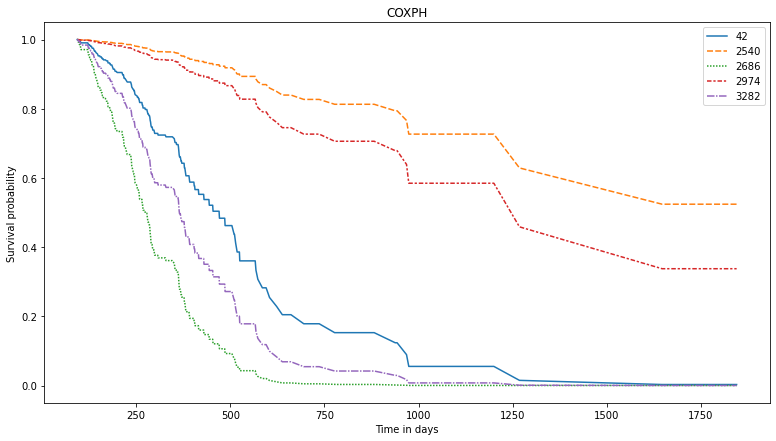

In [46]:
fig, ax = plt.subplots(figsize=(13,7))
result = cph.predict_survival_function(test_1)
ax = sns.lineplot(data = result)
ax.set(xlabel='Time in days', ylabel='Survival probability')
ax.set_title("COXPH")

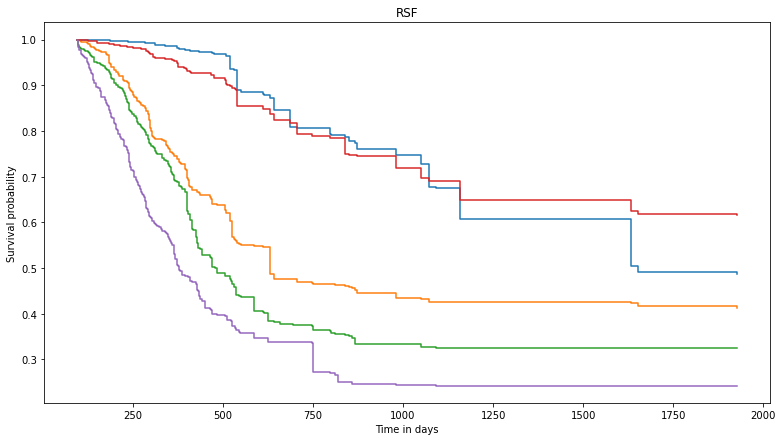

In [47]:
surv = rsf.predict_survival_function(df_test.iloc[-7:-2, :-2], return_array=True)

plt.figure(figsize=(13,7))

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.title('RSF')
plt.show()

In [38]:
df_test.iloc[-7:-2, -2:]

,time_opt,status_opt
2540,202,0
3282,360,0
42,244,1
2974,210,0
2686,414,0
